<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

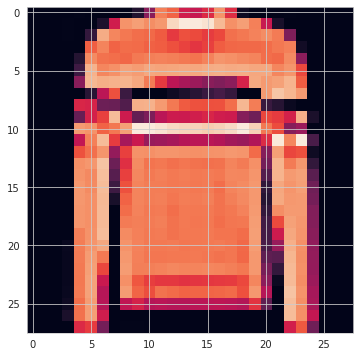

In [15]:
plt.imshow(X_train[5])

In [34]:
y_train[5]

2

In [20]:
X_train.shape

(60000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [21]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

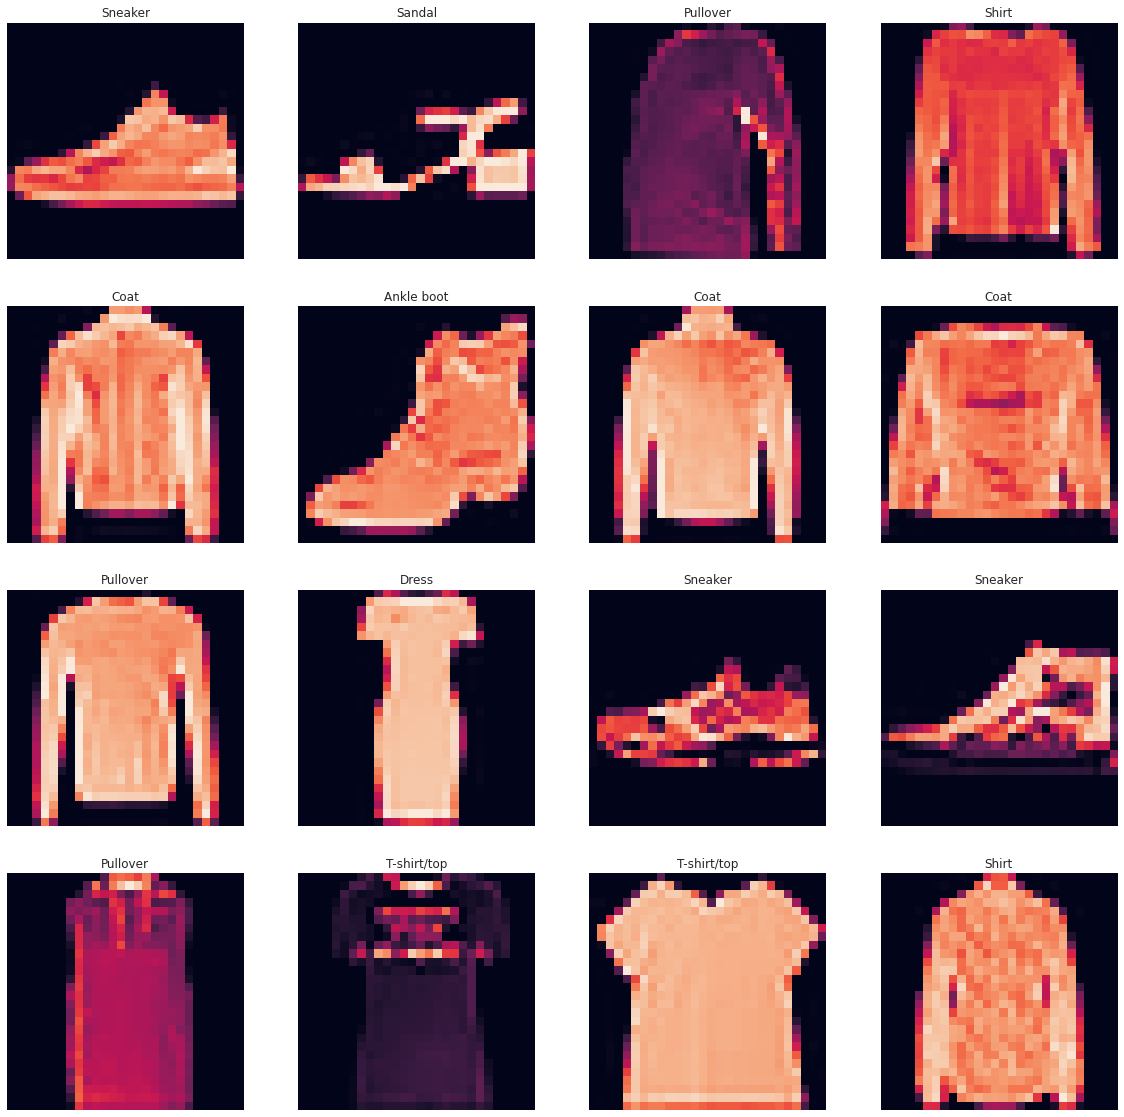

In [23]:
plt.figure(figsize = (20, 20))
for i in range(16):
  rand_index = int(np.random.randint(low=0, high=60000, size = 1))
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.title(classes[int(y_train[rand_index])])
  plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [26]:
X_train[3].min()

0

In [27]:
X_train[3].max()

255

In [28]:
X_train = X_train.astype("float")
X_test = X_test.astype("float")

X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train[3].min()

0.0

In [30]:
X_train[3].max()

1.0

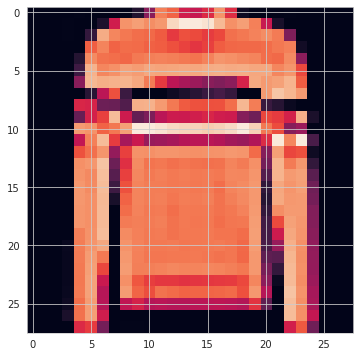

In [31]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_test.shape

(10000, 28, 28)

In [37]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [41]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [48]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [53]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor="val_accuracy", 
                           mode="max", 
                           patience=2,
                           restore_best_weights=True)

In [57]:
model.fit(X_train, y_train, 
          batch_size=64, 
          epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 14s 5ms/step - loss: 0.3977 - accuracy: 0.8586 - val_loss: 0.3174 - val_accuracy: 0.8873
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2553 - accuracy: 0.9069 - val_loss: 0.2855 - val_accuracy: 0.8985
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2091 - accuracy: 0.9251 - val_loss: 0.2687 - val_accuracy: 0.9091
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1784 - accuracy: 0.9355 - val_loss: 0.2636 - val_accuracy: 0.9105
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1536 - accuracy: 0.9451 - val_loss: 0.2912 - val_accuracy: 0.9124
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1325 - accuracy: 0.9519 - val_loss: 0.2761 - val_accuracy: 0.9153
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1147 - accuracy: 0.9591 - val_loss: 0.3010 - val_accuracy: 0.9168
Epoch

**TASK 7: Plot values of metrics you used in your model.**

In [59]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.398,0.859,0.317,0.887
1,0.255,0.907,0.286,0.899
2,0.209,0.925,0.269,0.909
3,0.178,0.935,0.264,0.910
4,0.154,0.945,0.291,0.912
5,0.132,0.952,0.276,0.915
6,0.115,0.959,0.301,0.917
7,0.102,0.965,0.315,0.914
8,0.089,0.969,0.330,0.913


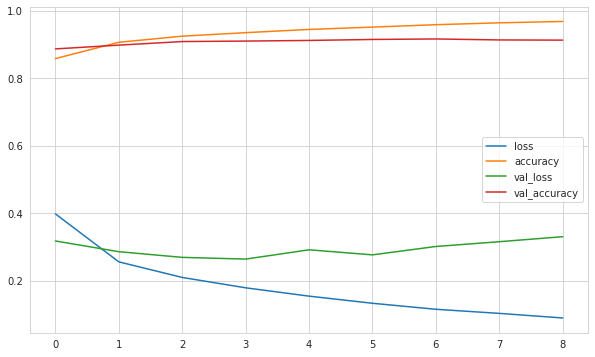

In [60]:
summary.plot()

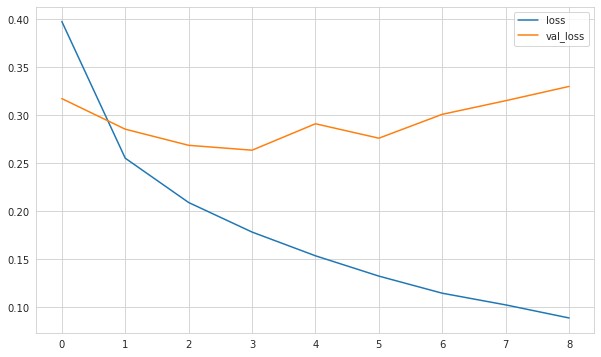

In [61]:
summary[["loss", "val_loss"]].plot()

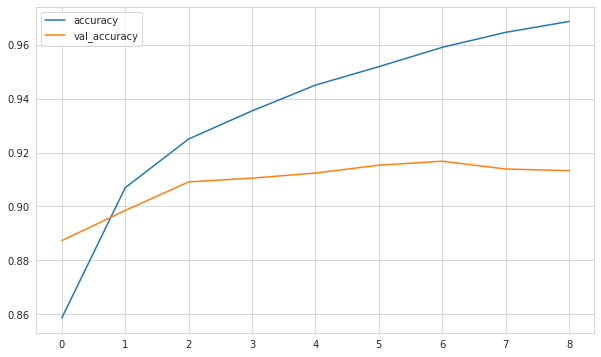

In [63]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.9168


[0.30100658535957336, 0.9168000221252441]

In [66]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.30100658535957336
Test accuracy 0.9168000221252441


In [87]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)


In [88]:
pred_prob.shape

(10000, 10)

In [89]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [91]:
y_test_arg=np.argmax(y_test,axis=1)

In [94]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

In [93]:
print(confusion_matrix(y_test_arg, Y_pred))

[[891   0   8   7   6   2  82   0   4   0]
 [  4 977   0   7   3   2   6   0   1   0]
 [ 26   0 835   6  64   0  68   0   1   0]
 [ 22   2   7 869  37   0  58   0   5   0]
 [  2   0  25  13 912   1  46   0   1   0]
 [  0   0   0   0   0 994   0   2   0   4]
 [111   0  35  10  62   0 776   0   6   0]
 [  0   0   0   0   0  20   0 958   1  21]
 [  4   0   0   1   1   1   3   2 988   0]
 [  0   0   0   0   0  10   1  21   0 968]]


In [98]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.92      0.83      0.87      1000
           3       0.95      0.87      0.91      1000
           4       0.84      0.91      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.78      0.76      1000
           7       0.97      0.96      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



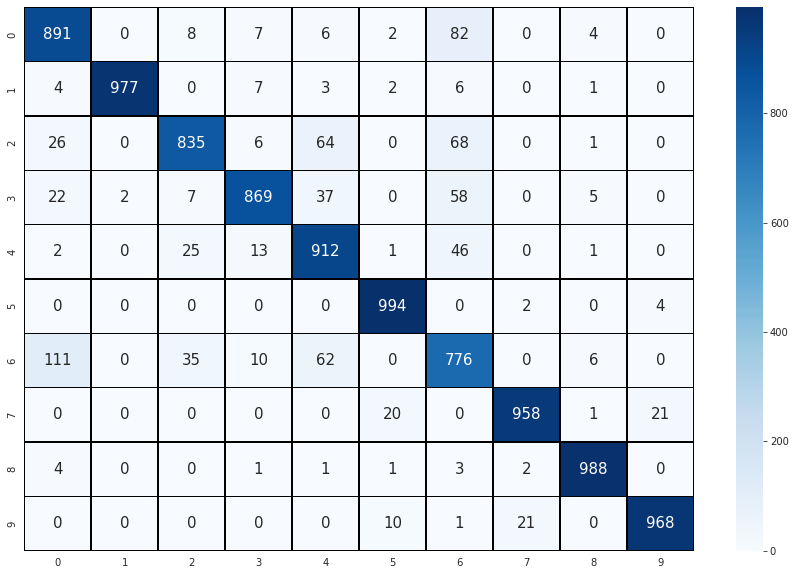

In [101]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred), 
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})

In [102]:
(y_test_arg != Y_pred).sum()

832

## Prediction

In [112]:
model.save("cnn-1.h5")

In [113]:
model = tf.keras.models.load_model("cnn-1.h5")

In [118]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))
np.argmax(pred)

1

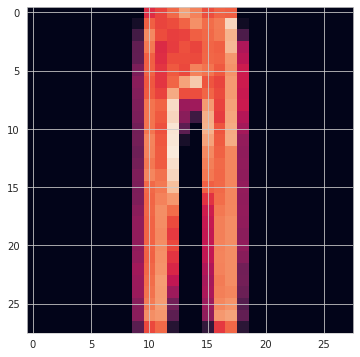

In [119]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment